# Creating a word cloud from documentation

In [ ]:
%pip install wordcloud
%pip install nltk

We start by extracting all of the documentation text into a single large text file. 

For each piece of text, we use an NLP library to tokenise and lemmatise it (trying to ensure that multiple variants of the same word are treated as the same).

Note that the path to the documentation needs to be inserted (bottom line).

In [2]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

def extract_text_from_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        print(f"Ignoring non-UTF-8 file: {file_path}")
        return ""

def tokenize_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def process_directory(directory_path):
    lemmatized_text = []
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            text = extract_text_from_file(file_path)
            if text:
                lemmatized_text.append(tokenize_and_lemmatize(text))
    return '\n\n'.join(lemmatized_text)

                    
# Replace 'your_directory_path' with the path to your documentation!
directory_text = process_directory('/Users/neil/My Drive/Research/Software/Repos/CausalTestingFramework/docs')

[nltk_data] Downloading package punkt to /Users/neil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/neil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ignoring non-UTF-8 file: /Users/neil/My Drive/Research/Software/Repos/CausalTestingFramework/docs/source/images/workflow.png
Ignoring non-UTF-8 file: /Users/neil/My Drive/Research/Software/Repos/CausalTestingFramework/docs/source/_static/images/CITCOM-logo.png


In [ ]:
Now we can use the WordCloud package to process our large text file into a graphical word cloud. 
We have added some stop words -- words that should not be included in the word count -- such as 'doc' and 'github'
, which are more related to the documentation itself rather than the program that is being documented.

[nltk_data] Downloading package stopwords to /Users/neil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


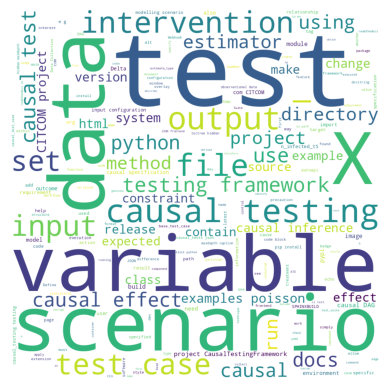

In [5]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('stopwords')

nltk_stopwords = set(stopwords.words('english'))

wc = WordCloud(background_color='white', 
     stopwords = nltk_stopwords.union(set(['doc','documentation','github','sphinx','http'])), width = 1000, height = 1000).generate(directory_text)
plt.axis("off")
plt.imshow(wc)

# A superficial analysis of module dependencies

Pydeps (https://github.com/thebjorn/pydeps) creates a dependency graph by scanning import statements 
in python files.

This needs to be installed on the command line first using pip - see instructions in the above link.

In [16]:
! pydeps "/Users/neil/My Drive/Research/Software/Repos/CausalTestingFramework/causal_testing" -Tpng --noshow --pylib-all --include-missing --cluster --rankdir LR